Dataset from Kaggle : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [16]:
data = pd.read_csv('car data.csv')

# Look into data

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows 301
Number of columns 9


### check null value


In [10]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### get statistics of dataset

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preprocessing

In [18]:
date = datetime.datetime.now()
print(date)

2023-07-20 18:14:01.975785


In [19]:
#step 1: get age of car
data['Age'] = date.year - data['Year']

In [21]:
data.drop('Year',axis=1,inplace=True)

<Axes: >

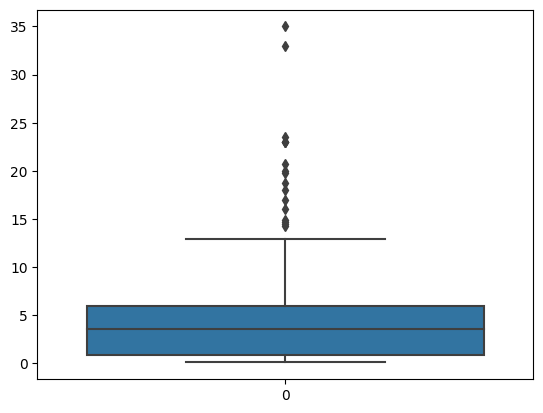

In [25]:
#step 2: check outlier
sns.boxplot(data['Selling_Price'])

In [26]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [29]:
#remove the outliers
data = data[~(data['Selling_Price']>=33.0)]

### Encoding Categorical

In [31]:
data_encoded = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], dtype=int)

### Feature Matrix X and Target y

In [33]:
X = data_encoded.drop(['Car_Name','Selling_Price'],axis=1)
y = data_encoded['Selling_Price']

### Split Dataset to trainings set and testing set

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

## Import Model and Model Training

In [37]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Prediction


In [48]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

Evaluate algorithm using R^2 score

In [51]:
score_lr = metrics.r2_score(y_test,y_pred_lr)
score_rf = metrics.r2_score(y_test,y_pred_rf)
score_gb = metrics.r2_score(y_test,y_pred_gb)
score_xgb = metrics.r2_score(y_test,y_pred_xgb)

In [52]:
print(score_lr,score_rf,score_gb,score_xgb)

0.6888271667453758 0.7333858001453395 0.8742948564212527 0.8851179518466968


In [55]:
final_data = pd.DataFrame({'Models':['LR','RF','GB','XGB'],
                "R2_Score":[score_lr,score_rf,score_gb,score_xgb]})

In [58]:
final_data

,Models,R2_Score
0,LR,0.688827
1,RF,0.733386
2,GB,0.874295
3,XGB,0.885118


<Axes: xlabel='Models', ylabel='R2_Score'>

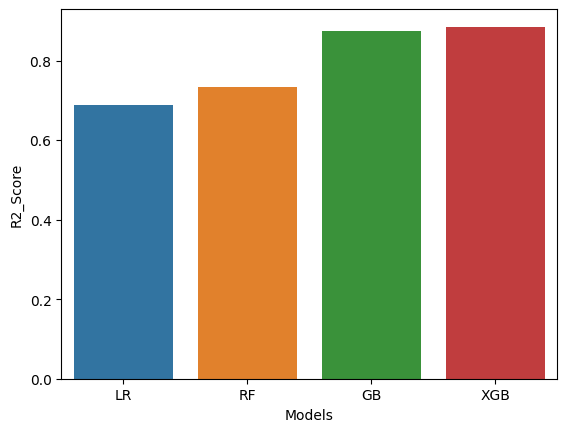

In [57]:
sns.barplot(x = final_data['Models'],y = final_data['R2_Score'])

### Save Model

In [59]:
xgb_model = xgb.fit(X,y)

In [60]:
import joblib

In [61]:
joblib.dump(xgb_model,'car_price_predictor')

['car_price_predictor']

In [62]:
model = joblib.load('car_price_predictor')

### Try prediction on New Data

In [73]:
new = pd.DataFrame({
    'Present_Price':5.8,
    'Kms_Driven':30000,
    'Owner':1,
    'Age':4,
    'Fuel_Type_CNG':0,
    'Fuel_Type_Diesel':1,
    'Fuel_Type_Petrol':0,
    'Seller_Type_Dealer':0,
    'Seller_Type_Individual':1,
    'Transmission_Automatic':1,
    'Transmission_Manual':0
},
index=[0])

In [74]:
model.predict(new)

array([5.4164715], dtype=float32)

# GUI for practice

In [81]:
from tkinter import *

def show():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    
    model = joblib.load('car_price_predictor')
    new = pd.DataFrame({
    'Present_Price':p1,
    'Kms_Driven':p2,
    'Owner':p3,
    'Age':p4,
    'Fuel_Type_CNG':p5,
    'Fuel_Type_Diesel':p6,
    'Fuel_Type_Petrol':p7,
    'Seller_Type_Dealer':p8,
    'Seller_Type_Individual':p9,
    'Transmission_Automatic':p10,
    'Transmission_Manual':p11
},
index=[0])
    result=model.predict(new)
    Label(master, text="Car Purchase Amount").grid(row=12)
    Label(master, text=result).grid(row=14)
    print("Car Purchase Amount",result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning",
             bg = "black", fg = "white"). grid(row=0,columnspan=2)

Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label(master, text="Owner").grid(row=3)
Label(master, text="Age").grid(row=4)
Label(master, text="Fuel_Type_CNG").grid(row=5)
Label(master, text="Fuel_Type_Diesel").grid(row=6)
Label(master, text="Fuel_Type_Petrol").grid(row=7)
Label(master, text="Seller_Type_Dealer").grid(row=8)
Label(master, text="Seller_Type_Individual").grid(row=9)
Label(master, text="Transmission_Automatic").grid(row=10)
Label(master, text="Transmission_Manual").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master, text='Predict',command=show).grid()

mainloop()

2023-07-20 19:31:52.111 python[8638:3948778] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


Car Purchase Amount 3.8152587
